<a href="https://colab.research.google.com/github/sergioGarcia91/ML_and_EDA/blob/main/04a_PlugsMesa_MLPRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Perceptron Regressor - Dataset: Plugs Mesa de Los Santos

> *Ser tan rápidos como el más lento, \
> y ser tan lentos como el más rápido.*

**Autor:** Sergio Andrés García Arias  
**Versión 01:** Enero 2024

# Introducción

En este Notebook utilizaremos el algoritmo de regresión o predicción supervisada conocido como `Multi-layer Perceptron Regressor`. Este algoritmo permite al modelo aprender a estimar valores para nuevos datos mediante la presentación de datos de entrada junto con sus correspondientes valores de salida.

> **Observación:** En este Notebook hemos optado por omitir la realización del Análisis Exploratorio de Datos (EDA). En un Notebook posterior, abordaremos este aspecto para profundizar en la comprensión de los datos. Se recomienda llevar a cabo el EDA antes de aplicar el `MLP Regressor` para obtener una visión más completa del conjunto de datos.

## ¿Cómo funciona?
Un Perceptrón Multicapa (MLP, por sus siglas en inglés) es una `Red Neuronal Artificial` con al menos tres capas:

- **Capa de Entrada**
- **Una o más Capas Ocultas**
- **Capa de Salida**

Durante la propagación hacia adelante, las conexiones entre las neuronas tienen pesos ajustables, y se aplica una función de activación. Las capas ocultas introducen no linealidades para abordar problemas complejos.

Durante el entrenamiento, se utiliza la retropropagación para ajustar pesos y sesgos, minimizando una función de pérdida. Después del entrenamiento, el MLP puede hacer predicciones para nuevas entradas. La arquitectura, las funciones de activación y los parámetros se ajustan para lograr un rendimiento óptimo.

<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/6/64/RedNeuronalArtificial.png' width=500 />

Red Neuronal Artificial de tipo perceptrón simple con n neuronas de entrada, m neuronas en su capa oculta y una neurona de salida. *Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Perceptr%C3%B3n_multicapa)*
</center>


# Inicio

In [1]:
!pip3 install contextily

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPRegressor # Para la Red Neuronal
from sklearn.preprocessing import MinMaxScaler # Para escalar los datos

import geopandas as gp
import contextily as cx #para el basemap en geopandas
import xyzservices.providers as xyz #para escoger el basemap

# Cargar CSV

In [3]:
url = 'https://raw.githubusercontent.com/sergioGarcia91/ML_and_EDA/main/Datasets/PlugsMesaLosSantos_2022.csv'
# CSV de los datos Plugs
df_Plugs = pd.read_csv(url, sep=';', decimal='.')

df_Plugs.head()

,Muestra,Estacion,MuestraNew,X,Y,Z,Formacion Geologica,Unidad,Litologia,Abreviacion,...,M Dry [mV/V],M Wet [mV/V],Vp [m/s],Peak Load [kN],Is50 [MPa],LF [SI],HF [SI],FD [%],Distancia Falla [m],Unnamed: 25
0,Ls5-12,LSN-01,LSN-01,1114949.39,1246238.02,1745.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,8.65,22.49,1059.0,1.32,0.41,0.000015,0.000024,-61.45,1579.23,NaN
1,Ls5-13a,LSN-02,LSN-02a,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.65,21.16,1294.0,1.82,0.61,0.000008,0.000003,59.76,577.10,NaN
2,Ls5-13b,LSN-02,LSN-02b,1115819.32,1247030.08,1761.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.83,14.52,2550.0,0.52,0.33,0.000021,0.000032,-49.71,577.10,NaN
3,Ls6-01,LSN-03,LSN-03,1115324.37,1256812.13,1677.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,47.46,7.52,3297.0,0.72,0.24,0.000003,0.000002,50.98,21.24,NaN
4,Ls6-02,LSN-04,LSN-04,1115076.27,1257212.30,1608.0,Fm. Los Santos,K1ls_ms,arenisca,Ar,...,9.74,33.65,2175.0,0.42,0.13,0.000021,0.000036,-69.97,211.66,NaN


In [4]:
df_Plugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Muestra              358 non-null    object 
 1   Estacion             358 non-null    object 
 2   MuestraNew           358 non-null    object 
 3   X                    358 non-null    float64
 4   Y                    358 non-null    float64
 5   Z                    358 non-null    float64
 6   Formacion Geologica  358 non-null    object 
 7   Unidad               358 non-null    object 
 8   Litologia            358 non-null    object 
 9   Abreviacion          358 non-null    object 
 10  Uni-Lito             358 non-null    object 
 11  Agua [%]             358 non-null    float64
 12  Porosidad [%]        358 non-null    float64
 13  Densidad [gr/cm3]    358 non-null    float64
 14  Rho Dry [Ohm*m]      358 non-null    float64
 15  Rho Wet [Ohm*m]      358 non-null    flo

In [5]:
df_Plugs.describe()

,X,Y,Z,Agua [%],Porosidad [%],Densidad [gr/cm3],Rho Dry [Ohm*m],Rho Wet [Ohm*m],M Dry [mV/V],M Wet [mV/V],Vp [m/s],Peak Load [kN],Is50 [MPa],LF [SI],HF [SI],FD [%],Distancia Falla [m],Unnamed: 25
count,3.580000e+02,3.580000e+02,358.000000,358.000000,358.000000,358.000000,3.580000e+02,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,3.580000e+02,3.580000e+02,358.000000,358.000000,0.0
mean,1.107876e+06,1.247329e+06,1353.933240,4.247737,4.847765,2.583883,1.757044e+05,1905.931363,11.153176,8.893592,2898.303324,4.373855,2.728965,4.707883e-04,4.661441e-04,12.943966,383.452793,NaN
std,5.167245e+03,6.687660e+03,228.391492,4.106131,5.315445,0.172947,4.335992e+05,3592.936510,15.064093,4.885653,1380.659247,3.764978,2.117483,3.198145e-03,3.218863e-03,38.342903,316.737887,NaN
min,1.098422e+06,1.237639e+06,719.000000,0.080000,0.000000,1.770000,2.105000e+01,26.880000,1.630000,1.930000,735.000000,0.020000,0.010000,2.200000e-08,1.880000e-08,-97.940000,0.020000,NaN
25%,1.103871e+06,1.242119e+06,1203.000000,1.725000,0.832500,2.540000,4.581217e+03,337.860000,4.335000,5.152500,1757.750000,1.520000,1.152500,7.402500e-06,5.042500e-06,-1.250000,149.640000,NaN
50%,1.107508e+06,1.245813e+06,1343.000000,3.275000,3.250000,2.620000,2.374373e+04,762.950000,7.615000,7.850000,2803.500000,3.660000,2.260000,3.885000e-05,3.200000e-05,9.770000,306.190000,NaN
75%,1.112396e+06,1.252772e+06,1546.000000,5.342500,7.217500,2.650000,1.347002e+05,1869.975000,12.325000,11.920000,3949.750000,6.220000,3.777500,1.577500e-04,1.410000e-04,33.815000,526.820000,NaN
max,1.117932e+06,1.259983e+06,1761.000000,29.590000,32.930000,3.360000,4.680624e+06,37015.690000,185.440000,33.650000,5995.000000,24.520000,10.780000,4.080000e-02,4.100000e-02,94.800000,1628.540000,NaN


# Preparación Previa

Para este modelo, nos enfocaremos exclusivamente en la propiedad de interés relacionada con la `Porosidad [%]`, la cual será redondeada a dos decimales. Además, se tomarán en cuenta las coordenadas de las muestras. Por último, aplicaremos el One-Hot Encoding a las unidades o formaciones geológicas para incluirlas como variables adicionales en nuestro modelo.

1. **Porosidad:**
   - La propiedad de porosidad será la variable de salida en nuestro modelo.
   - Redondearemos la porosidad a dos decimales para simplificar el análisis.

2. **Coordenadas:**
   - Incluiremos las coordenadas de las muestras como variables de entrada en nuestro modelo.
   - Esto permitirá que el modelo considere la ubicación espacial de las muestras.

3. **Unidades Geológicas (One-Hot Encoding):**
   - Realizaremos One-Hot Encoding a las formaciones geológicas presentes en los datos.
   - Esto convertirá las formaciones en variables binarias, permitiendo al modelo tener en cuenta su influencia.


In [6]:
# Crear nuevo DataFrame de la Porosidad
dfPorosidad = df_Plugs[['X', 'Y', 'Z',
                        'Unidad',
                        'Porosidad [%]']]

dfPorosidad['Porosidad [%]'] = np.round(dfPorosidad['Porosidad [%]'], 2)
dfPorosidad['Unidad'] = dfPorosidad['Unidad'].str.lower()

dfPorosidad.head()

<ipython-input-6-e60faff721e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPorosidad['Porosidad [%]'] = np.round(dfPorosidad['Porosidad [%]'], 2)
<ipython-input-6-e60faff721e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPorosidad['Unidad'] = dfPorosidad['Unidad'].str.lower()


,X,Y,Z,Unidad,Porosidad [%]
0,1114949.39,1246238.02,1745.0,k1ls_ms,10.98
1,1115819.32,1247030.08,1761.0,k1ls_ms,9.89
2,1115819.32,1247030.08,1761.0,k1ls_ms,7.84
3,1115324.37,1256812.13,1677.0,k1ls_ms,7.24
4,1115076.27,1257212.30,1608.0,k1ls_ms,20.17


## One-Hot Encoding

Para llevar a cabo el One-Hot Encoding, podemos aprovechar un método ya implementado en la biblioteca `Pandas` conocido como [`get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Este método resulta particularmente útil al trabajar con variables categóricas, como las unidades geológicas en nuestro conjunto de datos. Al aplicar `get_dummies`, se crean nuevas columnas para cada categoría, transformando las variables categóricas en representaciones binarias. Cada columna generada indica la presencia o ausencia de una categoría específica para cada muestra en nuestros datos.

In [7]:
dfPorosidad['Unidad2'] = dfPorosidad['Unidad']
dfPorosidad = pd.get_dummies(dfPorosidad, columns=['Unidad'],
                             prefix=[''], # para quitar el prefijo
                             prefix_sep='') # y el separador
dfPorosidad = dfPorosidad[['X', 'Y', 'Z', 'oss', 'j1-2j', 'j1gp', 'k1ls_mi',
                           'k1ls_mm', 'k1ls_ms', 'k1r', 'k1p', 'k1t', 'Porosidad [%]', 'Unidad2']]
dfPorosidad.head()

<ipython-input-7-fa77b705f976>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPorosidad['Unidad2'] = dfPorosidad['Unidad']


,X,Y,Z,oss,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1r,k1p,k1t,Porosidad [%],Unidad2
0,1114949.39,1246238.02,1745.0,0,0,0,0,0,1,0,0,0,10.98,k1ls_ms
1,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,9.89,k1ls_ms
2,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,7.84,k1ls_ms
3,1115324.37,1256812.13,1677.0,0,0,0,0,0,1,0,0,0,7.24,k1ls_ms
4,1115076.27,1257212.30,1608.0,0,0,0,0,0,1,0,0,0,20.17,k1ls_ms


In [8]:
dfPorosidad

,X,Y,Z,oss,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1r,k1p,k1t,Porosidad [%],Unidad2
0,1114949.39,1246238.02,1745.0,0,0,0,0,0,1,0,0,0,10.98,k1ls_ms
1,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,9.89,k1ls_ms
2,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,7.84,k1ls_ms
3,1115324.37,1256812.13,1677.0,0,0,0,0,0,1,0,0,0,7.24,k1ls_ms
4,1115076.27,1257212.30,1608.0,0,0,0,0,0,1,0,0,0,20.17,k1ls_ms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,1106688.92,1243510.55,1600.0,0,0,0,0,0,1,0,0,0,0.21,k1ls_ms
354,1106688.92,1243510.55,1600.0,0,0,0,0,0,1,0,0,0,2.51,k1ls_ms
355,1108226.39,1244837.57,1666.0,0,0,0,0,0,1,0,0,0,0.32,k1ls_ms
356,1108252.99,1245057.94,1688.0,0,0,0,0,0,1,0,0,0,0.90,k1ls_ms


# Escalar los datos

Para normalizar los datos de las coordenadas, haremos uso de la clase [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), la cual ya está implementada en la biblioteca `Scikit-Learn`. Al utilizar `MinMaxScaler`, aseguramos que las coordenadas se encuentren dentro de un intervalo definido, facilitando así el proceso de entrenamiento del modelo.


In [9]:
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(dfPorosidad[['X', 'Y', 'Z']].to_numpy())

MinMaxScaler()

In [10]:
scalerMinMax.data_max_

array([1117932.04, 1259982.9 ,    1761.  ])

In [11]:
scalerMinMax.data_min_

array([1.09842174e+06, 1.23763921e+06, 7.19000000e+02])

In [12]:
# Escalamos las coordenadas y las guardamos en X
X = scalerMinMax.transform(dfPorosidad[['X', 'Y', 'Z']].to_numpy())
X

array([[0.84712434, 0.38484288, 0.98464491],
       [0.89171258, 0.42029181, 1.        ],
       [0.89171258, 0.42029181, 1.        ],
       ...,
       [0.50253712, 0.32216523, 0.90882917],
       [0.5039005 , 0.33202797, 0.92994242],
       [0.56034812, 0.3549642 , 0.94337812]])

In [13]:
dfPorosidad.iloc[:, 3:-2]

,oss,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1r,k1p,k1t
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
353,0,0,0,0,0,1,0,0,0
354,0,0,0,0,0,1,0,0,0
355,0,0,0,0,0,1,0,0,0
356,0,0,0,0,0,1,0,0,0


In [14]:
# Incluimos lo Dummies
X = np.concatenate((X, dfPorosidad.iloc[:, 3:-2]),
                   axis=1) # para que ingrese como columnas
np.round(X[:5,:], 2)

array([[0.85, 0.38, 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  ],
       [0.89, 0.42, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  ],
       [0.89, 0.42, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  ],
       [0.87, 0.86, 0.92, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  ],
       [0.85, 0.88, 0.85, 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  ]])

In [15]:
# Nuestros valores objetivo
y = np.reshape(dfPorosidad.iloc[:, -2].to_numpy(), (-1,1))
y

array([[1.098e+01],
       [9.890e+00],
       [7.840e+00],
       [7.240e+00],
       [2.017e+01],
       [7.380e+00],
       [8.640e+00],
       [7.240e+00],
       [2.490e+00],
       [6.450e+00],
       [5.100e+00],
       [1.590e+00],
       [3.730e+00],
       [1.240e+00],
       [1.190e+00],
       [8.200e+00],
       [4.990e+00],
       [5.920e+00],
       [5.470e+00],
       [3.610e+00],
       [1.967e+01],
       [1.640e+00],
       [1.040e+00],
       [3.620e+00],
       [6.940e+00],
       [4.760e+00],
       [1.652e+01],
       [1.099e+01],
       [1.119e+01],
       [9.120e+00],
       [1.008e+01],
       [8.370e+00],
       [4.230e+00],
       [2.740e+00],
       [7.150e+00],
       [1.072e+01],
       [9.580e+00],
       [1.088e+01],
       [1.074e+01],
       [6.880e+00],
       [1.896e+01],
       [4.270e+00],
       [6.850e+00],
       [1.063e+01],
       [9.030e+00],
       [3.940e+00],
       [3.500e-01],
       [3.300e-01],
       [2.500e-01],
       [6.480e+00],


> **Observación:** En esta ocasión, optaremos por no realizar la división en conjuntos de entrenamiento y prueba mediante el uso de `Train Test Split`, eligiendo utilizar todas las muestras disponibles para el entrenamiento del modelo. No obstante, es importante tener en cuenta que la división tradicional es esencial para evaluar de manera adecuada el rendimiento del modelo en un conjunto de datos independiente.


# Entrenamiento

Para llevar a cabo el entrenamiento supervisado de los valores de porosidad correspondientes a las unidades geológicas en la Mesa de Los Santos, utilizaremos la clase [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) de la biblioteca `Scikit-Learn`.

Simplificaremos la configuración del modelo ajustando los siguientes parámetros:

- `hidden_layer_sizes`: especifica el número de neuronas por capa, excluyendo la capa final.
- `activation`: se mantendrá en `relu`.
- `random_state`: se establecerá para asegurar la reproducibilidad de los resultados.
- `early_stopping`: detendrá el entrenamiento si el error no disminuye de manera significativa.


In [16]:
'''
[270, 75, 23] score: 15.96
[550, 145, 37] score: 28.21
[680, 195, 54] score: 31.63
[2380, 1045, 479] score: 20.12
[2580, 1145, 529] score: 32.84
[50, 30, 9] score: 12.89
[80, 45, 12] score: 17.08
[280, 145, 32] score: 20.97
[260, 135, 30] score: 15.3
[40, 25, 8] score: 13.89
'''
# Se crea el modelo
capas = [50, 30, 9]
modelo_MLPReg = MLPRegressor(hidden_layer_sizes=tuple(capas),
                             activation='relu', #identity, logistic, tanh, relu
                             early_stopping=True,
                             random_state= 0)
# Se entrena
modelo_MLPReg.fit(X, y)
# Se puntua
score = modelo_MLPReg.score(X, y) * 100 # Uno puntaje de 13.89% ... se hace con los datos de Test de tenerlos
score = round(score, 2)
print(score)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


12.89


# Predicción

In [17]:
dfPorosidad['Poro-pred'] = np.round(modelo_MLPReg.predict(X), 2)
dfPorosidad.head(10)

,X,Y,Z,oss,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1r,k1p,k1t,Porosidad [%],Unidad2,Poro-pred
0,1114949.39,1246238.02,1745.0,0,0,0,0,0,1,0,0,0,10.98,k1ls_ms,7.02
1,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,9.89,k1ls_ms,7.12
2,1115819.32,1247030.08,1761.0,0,0,0,0,0,1,0,0,0,7.84,k1ls_ms,7.12
3,1115324.37,1256812.13,1677.0,0,0,0,0,0,1,0,0,0,7.24,k1ls_ms,8.17
4,1115076.27,1257212.30,1608.0,0,0,0,0,0,1,0,0,0,20.17,k1ls_ms,8.09
5,1114601.39,1257700.61,1523.0,0,0,0,1,0,0,0,0,0,7.38,k1ls_mi,6.92
6,1115132.61,1257617.41,1443.0,0,1,0,0,0,0,0,0,0,8.64,j1-2j,4.52
7,1115132.61,1257617.41,1443.0,0,1,0,0,0,0,0,0,0,7.24,j1-2j,4.52
8,1115132.61,1257617.41,1443.0,0,1,0,0,0,0,0,0,0,2.49,j1-2j,4.52
9,1115089.35,1259669.04,1195.0,0,0,1,0,0,0,0,0,0,6.45,j1gp,2.81


## Gráfica

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


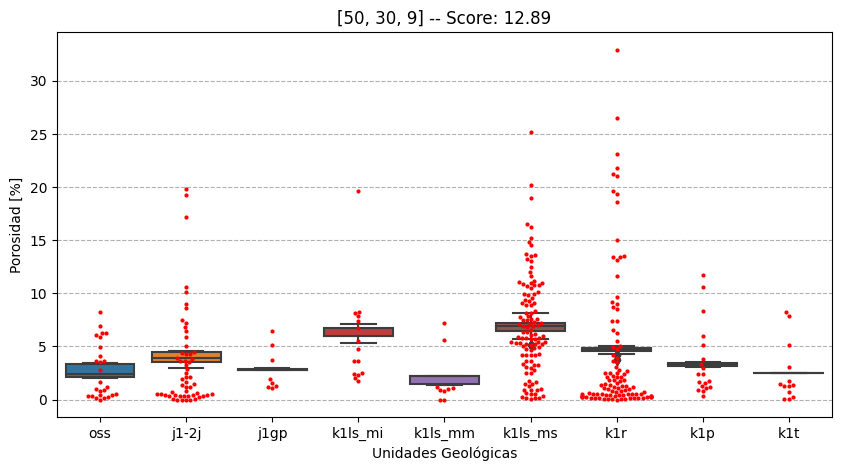

In [18]:
orden_Geo = ['oss', 'j1-2j', 'j1gp', 'k1ls_mi',
             'k1ls_mm', 'k1ls_ms', 'k1r', 'k1p', 'k1t']

fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=dfPorosidad,
            x='Unidad2',
            y='Poro-pred',
            ax=ax,
            order=orden_Geo)

sns.swarmplot(data=dfPorosidad,
              x='Unidad2',
              y='Porosidad [%]',
              ax=ax,
              color='r',
              size=3,
              order=orden_Geo)

plt.grid(ls='--', axis='y')

ax.set_ylabel('Porosidad [%]')
ax.set_xlabel('Unidades Geológicas')

plt.title(f'{capas} -- Score: {score}')
plt.show()

## Mapa

In [19]:
url_CSV_Mapa = 'https://github.com/sergioGarcia91/ML_and_EDA/raw/main/Datasets/GeologiaMesaLosSantos_Pinto_etal_2007.csv'

# CSV del mapa geologico
df_MapaGeo = pd.read_csv(url_CSV_Mapa, sep=',', decimal='.')
df_MapaGeo.columns = ['coorX', 'coorY', 'coorZ', 'formacion']

df_MapaGeo.head()

,coorX,coorY,coorZ,formacion
0,1109036.77,1259898.34,1284.0,K1ls_mi
1,1109136.77,1259898.34,1309.0,K1ls_mi
2,1109236.77,1259898.34,1317.0,K1ls_mi
3,1109336.77,1259898.34,1330.0,K1ls_mi
4,1109436.77,1259898.34,1350.0,K1ls_mi


In [20]:
df_MapaGeo['formacion'] = df_MapaGeo['formacion'].str.lower()
df_MapaGeo['Unidades'] = df_MapaGeo['formacion']

df_MapaGeo.head()

,coorX,coorY,coorZ,formacion,Unidades
0,1109036.77,1259898.34,1284.0,k1ls_mi,k1ls_mi
1,1109136.77,1259898.34,1309.0,k1ls_mi,k1ls_mi
2,1109236.77,1259898.34,1317.0,k1ls_mi,k1ls_mi
3,1109336.77,1259898.34,1330.0,k1ls_mi,k1ls_mi
4,1109436.77,1259898.34,1350.0,k1ls_mi,k1ls_mi


In [21]:
df_MapaGeo['formacion'].unique() # Toca ajustar

array(['k1ls_mi', 'j1-2j', 'oss', 'j1gp', 'k1ls_mm', 'k1ls_ms', 'k1r',
       'k1p', 'k1t', 'jordan', 'rosablanca', 'lossantos_inf',
       'lossantoos_sup', 'lossantos_med', 'paja', 'tablazo',
       'lossantos_sup', 'granito', 'silgara'], dtype=object)

In [22]:
# Para eliminar mejor estas
dicc_ReplaceUnidades = {'jordan': np.nan,
                        'lossantos_inf': np.nan,
                        'lossantos_med': np.nan,
                        'lossantos_sup': np.nan,
                        'granito': np.nan,
                        'silgara': np.nan,
                        'rosablanca': np.nan,
                        'paja': np.nan,
                        'tablazo': np.nan,
                        'lossantoos_sup': np.nan}

df_MapaGeo['formacion'].replace(dicc_ReplaceUnidades,
                                inplace=True)

df_MapaGeo.dropna(inplace=True)

df_MapaGeo = pd.get_dummies(df_MapaGeo, columns=['formacion'],
                            prefix=[''],
                            prefix_sep='')

df_MapaGeo.head()

,coorX,coorY,coorZ,Unidades,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1p,k1r,k1t,oss
0,1109036.77,1259898.34,1284.0,k1ls_mi,0,0,1,0,0,0,0,0,0
1,1109136.77,1259898.34,1309.0,k1ls_mi,0,0,1,0,0,0,0,0,0
2,1109236.77,1259898.34,1317.0,k1ls_mi,0,0,1,0,0,0,0,0,0
3,1109336.77,1259898.34,1330.0,k1ls_mi,0,0,1,0,0,0,0,0,0
4,1109436.77,1259898.34,1350.0,k1ls_mi,0,0,1,0,0,0,0,0,0


In [23]:
# Escalar coordenadas
coorX = scalerMinMax.transform(df_MapaGeo[['coorX', 'coorY', 'coorZ']].to_numpy())

# Sacar unidades en el mismo orden del entrenamiento
uniGeo = df_MapaGeo[orden_Geo]


In [24]:
coorX

array([[ 0.54407313,  0.99621549,  0.54222649],
       [ 0.54919863,  0.99621549,  0.56621881],
       [ 0.55432413,  0.99621549,  0.57389635],
       ...,
       [ 0.45693967, -0.09133988, -0.26583493],
       [ 0.46206517, -0.09133988, -0.26857965],
       [ 0.46719066, -0.09133988, -0.26583493]])

In [25]:
uniGeo

,oss,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1r,k1p,k1t
0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
40820,0,1,0,0,0,0,0,0,0
40821,0,1,0,0,0,0,0,0,0
40822,0,1,0,0,0,0,0,0,0
40823,0,1,0,0,0,0,0,0,0


In [26]:
X_Mapa = np.concatenate((coorX, uniGeo.to_numpy()),
                         axis=1)
np.round(X_Mapa[:5,:], 2)

array([[0.54, 1.  , 0.54, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.55, 1.  , 0.57, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.55, 1.  , 0.57, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.56, 1.  , 0.59, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.56, 1.  , 0.61, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ]])

In [27]:
df_MapaGeo['Poro-pred'] = np.round(modelo_MLPReg.predict(X_Mapa), 2)
df_MapaGeo.head()

,coorX,coorY,coorZ,Unidades,j1-2j,j1gp,k1ls_mi,k1ls_mm,k1ls_ms,k1p,k1r,k1t,oss,Poro-pred
0,1109036.77,1259898.34,1284.0,k1ls_mi,0,0,1,0,0,0,0,0,0,6.00
1,1109136.77,1259898.34,1309.0,k1ls_mi,0,0,1,0,0,0,0,0,0,6.06
2,1109236.77,1259898.34,1317.0,k1ls_mi,0,0,1,0,0,0,0,0,0,6.09
3,1109336.77,1259898.34,1330.0,k1ls_mi,0,0,1,0,0,0,0,0,0,6.12
4,1109436.77,1259898.34,1350.0,k1ls_mi,0,0,1,0,0,0,0,0,0,6.17


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


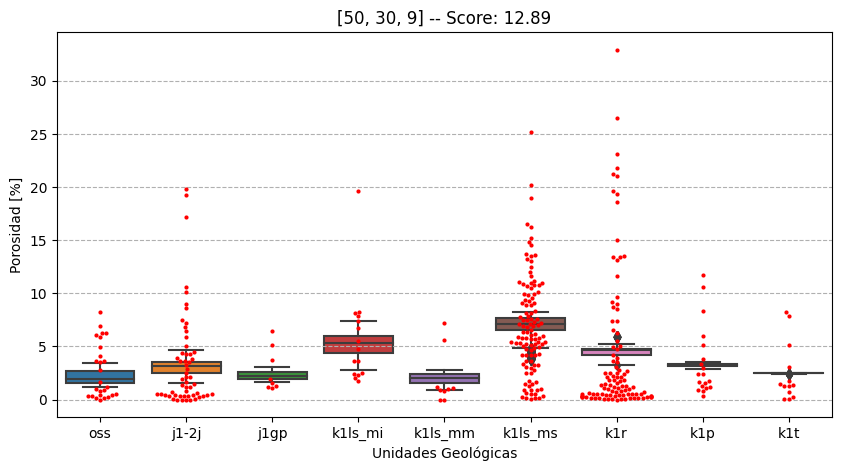

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_MapaGeo,
            x='Unidades',
            y='Poro-pred',
            ax=ax,
            order=orden_Geo)

sns.swarmplot(data=dfPorosidad,
              x='Unidad2',
              y='Porosidad [%]',
              ax=ax,
              color='r',
              size=3,
              order=orden_Geo)

plt.grid(ls='--', axis='y')

ax.set_ylabel('Porosidad [%]')
ax.set_xlabel('Unidades Geológicas')

plt.title(f'{capas} -- Score: {score}')
plt.show()

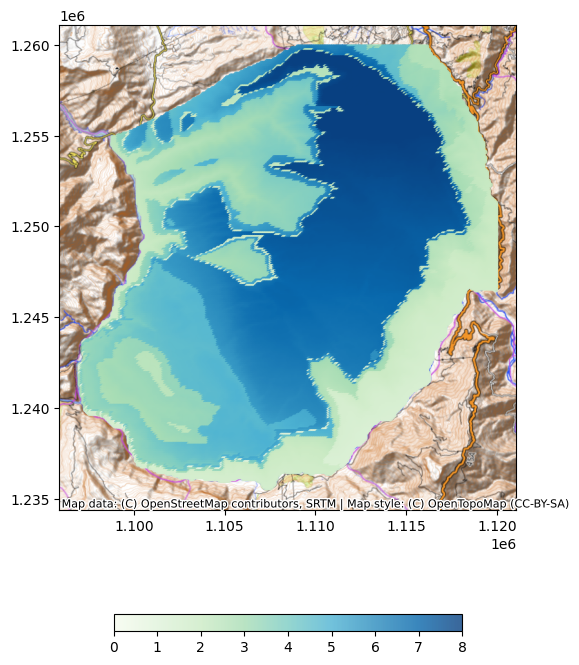

In [29]:
fig, ax = plt.subplots(figsize=(9,9))

poro = ax.scatter(df_MapaGeo['coorX'], df_MapaGeo['coorY'],
                  c= df_MapaGeo['Poro-pred'],
                  s=7,
                  cmap='GnBu',
                  vmin=0,
                  vmax=int(df_MapaGeo['Poro-pred'].max()),
                  alpha=0.8)

cx.add_basemap(ax=ax,
               crs='epsg:3116', # el sistema de coordenadas
               source=xyz.OpenTopoMap,
               reset_extent=True) # Para incluir un mapa base

plt.colorbar(mappable=poro, shrink=0.5, orientation='horizontal')

plt.show()

# Observaciones

Como habrá notado, la estructura de este algoritmo es algo similar a la vista en el `MLPClassifier`. A pesar de que los modelos obtenidos con el `MLPRegressor` no logran un `score` superior a `0.5`, parecen exhibir una coherencia geológica. Esto plantea algunas preguntas que podrían ser exploradas:

- Dada la ausencia del Análisis Exploratorio de Datos (EDA), ¿podría esta omisión ser significativa? ¿Existen posibles desproporciones en las muestras que podrían afectar los resultados?
- ¿Es necesario el uso de `get_dummies` para realizar One-Hot Encoding en este caso? ¿Qué sucede si se ingresa una columna con un número identificador para cada unidad geológica?
- ¿Se podría incluir algún otro parámetro adicional para mejorar el rendimiento del modelo durante el entrenamiento? ¿Cuál podría ser ese parámetro?
- ¿Cómo afecta el cambio de la función de activación al modelo? ¿Se observan diferencias sustanciales al utilizar una función de activación diferente?

---
El `MLPRegressor` comparte limitaciones y consideraciones similares a las del `MLPClassifier`. De manera adicional, se podrían considerar para ambos:

1. **Interpretabilidad:** Las redes neuronales tienden a ser consideradas como cajas negras, lo que significa que puede ser difícil interpretar cómo y por qué toman ciertas decisiones, especialmente en modelos complejos.
2. **Escalado de Características:** Las variables de entrada deben estar en una escala similar para evitar que algunas características dominen sobre otras. Se suele aplicar la normalización o estandarización de los datos.
3. **Regularización:** La aplicación de técnicas de regularización, como la L1 o L2, puede ser necesaria para evitar el sobreajuste y mejorar la generalización del modelo.



# Fin